In [52]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns; sns.set()
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
import os
import time
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import average_precision_score

In [53]:
dataset = pd.read_csv("Dataset_heart rate_retail stores.csv") #load training data
dataset.columns

Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

In [54]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,female,30.0,7.0,2.0,noon,23,no,no,...,monday,0,115,71,95,8,72,4,12,0
1,2,25,female,18.4,9.0,1.0,noon,23,yes,no,...,monday,1,110,82,112,24,70,18,26,0
2,3,38,male,25.1,5.0,3.0,noon,23,no,no,...,monday,0,116,74,115,18,75,20,24,0
3,4,21,female,22.6,8.0,0.0,evening,23,yes,family,...,monday,1,146,55,122,26,62,41,46,0
4,5,30,female,21.7,12.0,10.0,evening,23,yes,life partner,...,monday,0,111,44,120,39,61,20,41,1


In [55]:
dataset.describe()

,Id,age,BMI,sleeping_time,sporting_activity_(h/week),outdoor_temperature,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,84.727273,40.278788,25.183636,7.230303,2.857576,21.090909,0.369697,115.109091,72.600000,117.690909,22.181818,63.236364,17.333333,35.436364,0.503030
std,48.777664,14.241638,4.217057,1.345155,2.665158,3.552426,0.484192,14.192070,13.347056,13.270460,17.678109,11.166091,17.559423,19.254170,0.501513
min,1.000000,18.000000,16.600000,3.000000,0.000000,12.000000,0.000000,70.000000,44.000000,80.000000,1.000000,43.000000,1.000000,6.000000,0.000000
25%,43.000000,29.000000,22.200000,6.000000,1.000000,18.000000,0.000000,106.000000,65.000000,109.000000,8.000000,55.000000,6.000000,22.000000,0.000000
50%,85.000000,40.000000,25.000000,7.000000,2.000000,21.000000,0.000000,116.000000,72.000000,118.000000,17.000000,64.000000,13.000000,33.000000,1.000000
75%,127.000000,52.000000,27.700000,8.000000,4.000000,23.000000,1.000000,124.000000,80.000000,124.000000,32.000000,72.000000,23.000000,46.000000,1.000000
max,168.000000,72.000000,37.600000,12.000000,14.000000,28.000000,1.000000,148.000000,120.000000,163.000000,86.000000,88.000000,150.000000,98.000000,1.000000


In [56]:
dataset.shape

(165, 23)

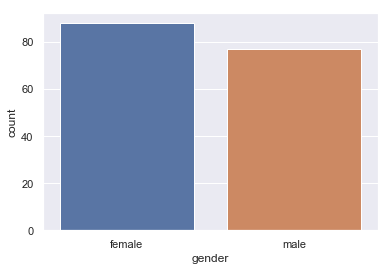

In [57]:
sns.countplot(dataset['gender'],label="Count")

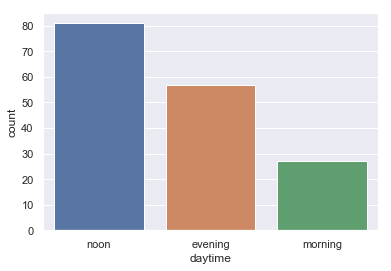

In [58]:
sns.countplot(dataset['daytime'],label="Count")

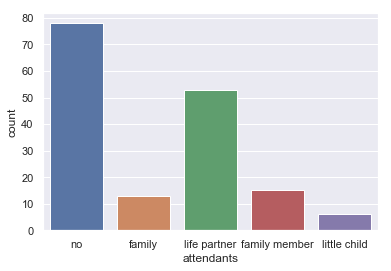

In [59]:
sns.countplot(dataset['attendants'],label="Count")

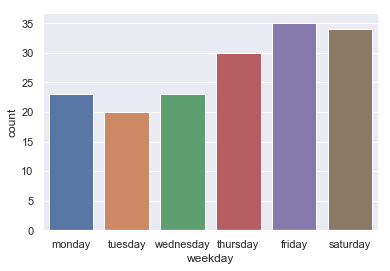

In [60]:
sns.countplot(dataset['weekday'],label="Count")

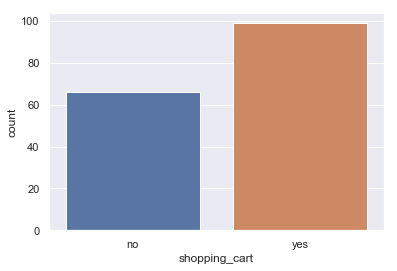

In [61]:
sns.countplot(dataset['shopping_cart'],label="Count")

In [62]:
gender = {'female': 0,'male': 1}
dataset.gender = [gender[item] for item in dataset.gender]
daytime = {'noon': 1,'evening': 2,'morning': 3}
dataset.daytime = [daytime[item] for item in dataset.daytime]

In [63]:
attendants = {'no': 1,'family': 2,'life partner': 3,'family member': 4,'little child': 5}
dataset.attendants = [attendants[item] for item in dataset.attendants]

weekday = {'monday': 1,'tuesday': 2,'wednesday': 3,'thursday': 4,'friday': 5,'saturday': 6}
dataset.weekday = [weekday[item] for item in dataset.weekday]

In [64]:
shopping_cart = {'no': 0,'yes': 1}
dataset.shopping_cart = [shopping_cart[item] for item in dataset.shopping_cart]

In [65]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,0,30.0,7.0,2.0,1,23,0,1,...,1,0,115,71,95,8,72,4,12,0
1,2,25,0,18.4,9.0,1.0,1,23,1,1,...,1,1,110,82,112,24,70,18,26,0
2,3,38,1,25.1,5.0,3.0,1,23,0,1,...,1,0,116,74,115,18,75,20,24,0
3,4,21,0,22.6,8.0,0.0,2,23,1,2,...,1,1,146,55,122,26,62,41,46,0
4,5,30,0,21.7,12.0,10.0,2,23,1,3,...,1,0,111,44,120,39,61,20,41,1


In [66]:
dataset.columns

Index(['Id', 'age', 'gender', 'BMI', 'sleeping_time',
       'sporting_activity_(h/week)', 'daytime', 'outdoor_temperature',
       'shopping_cart', 'attendants', 'shopping_frequency', 'cash_point',
       'shopping_amount', 'weekday', 'smoking', 'ex_max', 'ex_min', 'hr_max',
       'max_time', 'hr_min', 'min_time', 'shopping duration (in minutes)',
       'reaching HRmax'],
      dtype='object')

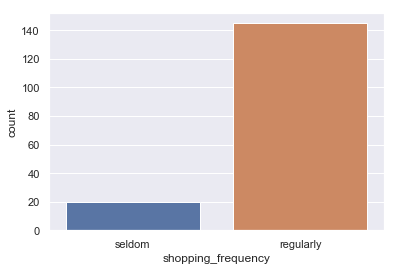

In [67]:
sns.countplot(dataset['shopping_frequency'],label="Count")

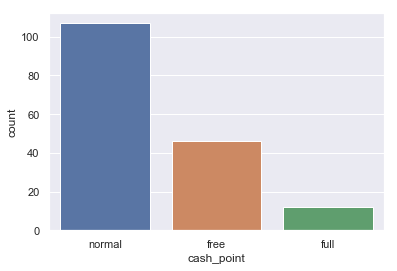

In [68]:
sns.countplot(dataset['cash_point'],label="Count")

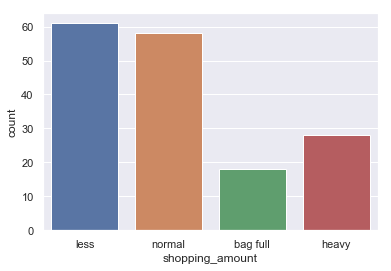

In [69]:
sns.countplot(dataset['shopping_amount'],label="Count")

In [70]:
shopping_frequency = {'seldom': 1,'regularly': 1}
dataset.shopping_frequency = [shopping_frequency[item] for item in dataset.shopping_frequency]
cash_point = {'normal': 1,'free': 2,'full': 3}
dataset.cash_point = [cash_point[item] for item in dataset.cash_point]
shopping_amount = {'less': 1,'normal': 2,'bag full': 3,'heavy': 4}
dataset.shopping_amount = [shopping_amount[item] for item in dataset.shopping_amount]

In [71]:
dataset.head()

,Id,age,gender,BMI,sleeping_time,sporting_activity_(h/week),daytime,outdoor_temperature,shopping_cart,attendants,...,weekday,smoking,ex_max,ex_min,hr_max,max_time,hr_min,min_time,shopping duration (in minutes),reaching HRmax
0,1,55,0,30.0,7.0,2.0,1,23,0,1,...,1,0,115,71,95,8,72,4,12,0
1,2,25,0,18.4,9.0,1.0,1,23,1,1,...,1,1,110,82,112,24,70,18,26,0
2,3,38,1,25.1,5.0,3.0,1,23,0,1,...,1,0,116,74,115,18,75,20,24,0
3,4,21,0,22.6,8.0,0.0,2,23,1,2,...,1,1,146,55,122,26,62,41,46,0
4,5,30,0,21.7,12.0,10.0,2,23,1,3,...,1,0,111,44,120,39,61,20,41,1


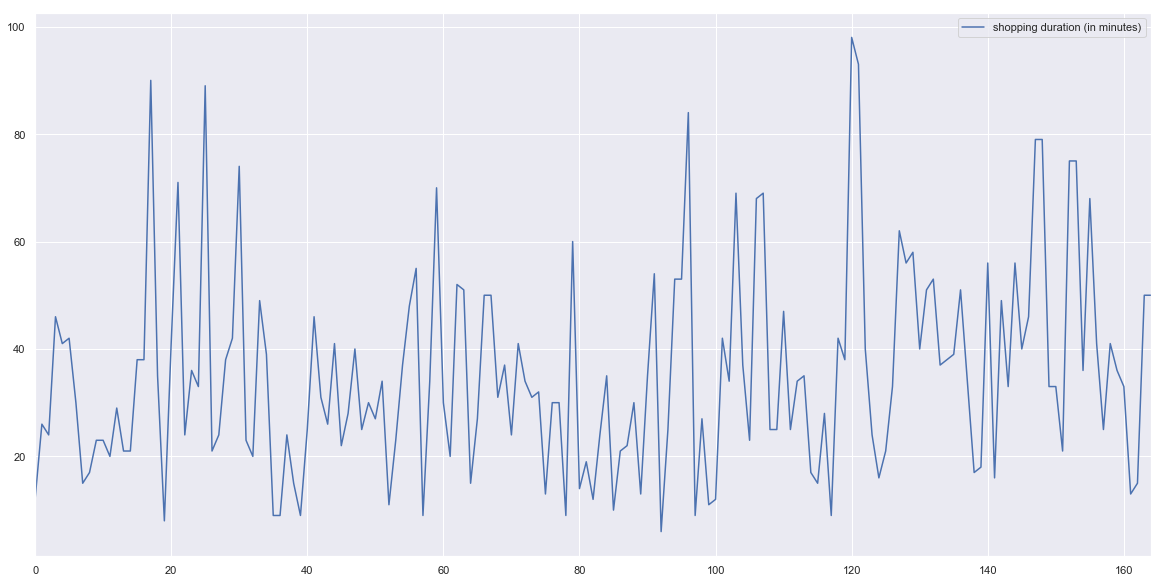

In [72]:
dataset.plot(y="shopping duration (in minutes)",figsize=(20,10))

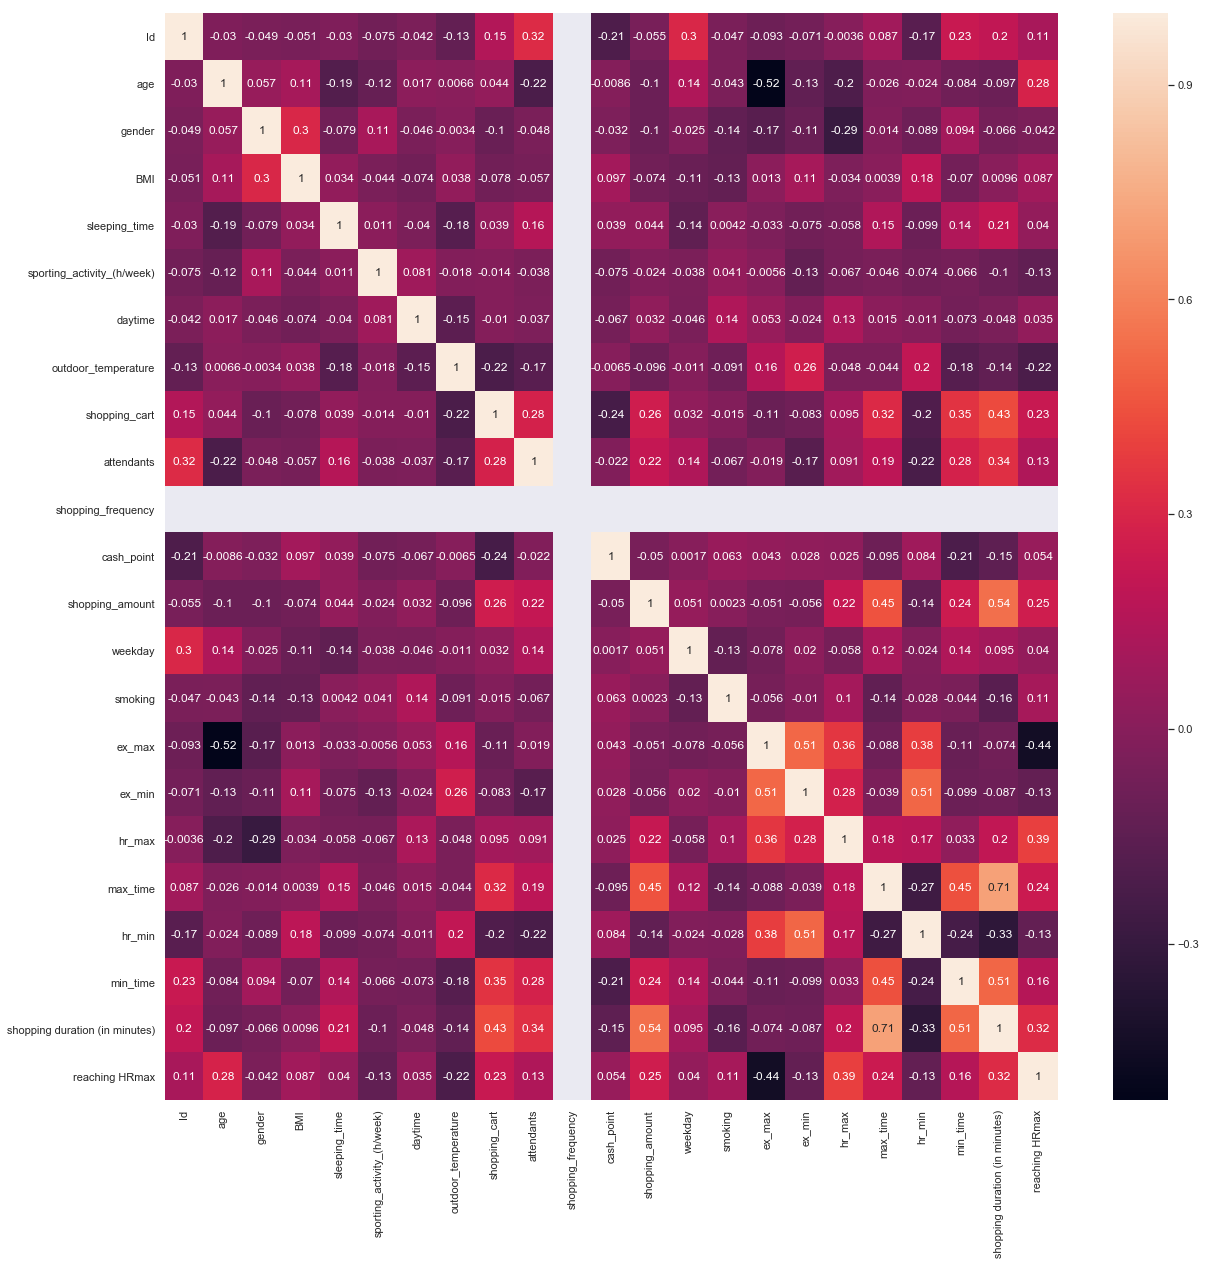

In [73]:
#heat map (Correlation Matrix)
plt.figure(figsize  =(20,20))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Feature Selection Techniques

If we look at the heat map, we can see that age, gender, sporting_activity, outdoor_temparature, smoking, 
ex_max, ex_min and hr_min are negatively correlated with shopping duration. To confirm more, we can apply
feature importance technique to check Univariate Feature Selection technique to check which independent 
features are most important to our dependent feature (shopping duration).

In [74]:
#Univariate Feature Selection
X = dataset.iloc[:,1:21]  
y = dataset.iloc[:,-2]   
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  

#Feature Importance
X = dataset.iloc[:,1:21]  
y = dataset.iloc[:,-2]    
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [75]:
feat_imp = feat_importances.nlargest(23)
univariate = featureScores.nlargest(23,'Score')

In [76]:
feat_imp

max_time                      0.083871
sporting_activity_(h/week)    0.074019
age                           0.066422
sleeping_time                 0.062881
weekday                       0.061706
min_time                      0.060479
ex_max                        0.059815
BMI                           0.057512
hr_min                        0.055254
outdoor_temperature           0.054146
ex_min                        0.050568
hr_max                        0.048600
attendants                    0.048142
daytime                       0.046441
shopping_amount               0.045537
smoking                       0.034836
cash_point                    0.034106
gender                        0.031149
shopping_cart                 0.024517
shopping_frequency            0.000000
dtype: float64

In [77]:
univariate

,Specs,Score
17,max_time,1889.517925
19,min_time,1800.788187
0,age,331.913321
15,ex_min,174.735111
18,hr_min,163.584011
4,sporting_activity_(h/week),163.198834
14,ex_max,129.472031
16,hr_max,95.002185
12,weekday,53.710154
11,shopping_amount,53.483340


Few features such as cash_point, shopping_frequency, gender, shopping_cart, BMI, smoking are not so important
for our dependent variable (shoping duration) according to both feature selection approaches. On the other hand,
independent feature such as max_time, min_time, age, hr_min, ex_min, ex_max, sporting_activity_(h/week),
weekday, attendants, outdoor_temperature, BMI are important for both our response variable. So we only take these
features to predict the shopping duration.

In [78]:
msk = np.random.rand(len(dataset)) <= 0.7

train = dataset[msk]
test = dataset[~msk]

In [79]:
X_train = train[['max_time','min_time','age','hr_min','ex_min','ex_max','sporting_activity_(h/week)','weekday','attendants','outdoor_temperature', 'BMI']]
X_test = test[['max_time','min_time','age','hr_min','ex_min','ex_max','sporting_activity_(h/week)','weekday','attendants','outdoor_temperature', 'BMI']]

In [80]:
Y_train = train['shopping duration (in minutes)']
Y_test = test['shopping duration (in minutes)']

# Machine Learning

1. Linear Regression
2. Support Vector Machine
3. Random Forest
4. Gradient Boosting

# Predicting Shopping Duration

In [81]:
#Linear Regression
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [82]:
Y_prediction_LR = LR.predict(X_test)

In [83]:
LR.score(X_test,Y_test)

0.24482212783041457

In [84]:
LR.score(X_train, Y_train)

0.6595612765937874

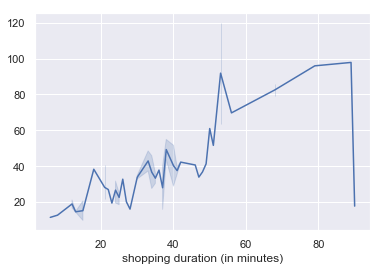

In [96]:
sns.lineplot(Y_test, Y_prediction_LR)

In [87]:
#Support Vector Machine
SVMachine = svm.SVR(kernel='rbf')
SVMachine.fit(X_train, Y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [88]:
Y_prediction_SVM = SVMachine.predict(X_test)

In [89]:
SVMachine.score(X_test, Y_test)

-0.028104413675143377

In [90]:
SVMachine.score(X_train, Y_train)

0.05023682712362676

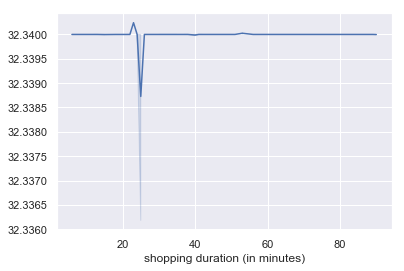

In [97]:
sns.lineplot(Y_test, Y_prediction_SVM)

In [98]:
#Random Forest
RF = RandomForestRegressor(n_estimators=1, max_depth=2, bootstrap=False, min_samples_leaf=1)

In [99]:
RF.fit(X_train, Y_train)
Y_prediction_RF = RF.predict(X_test)
RF.score(X_test,Y_test)

0.4663814848718195

In [100]:
RF.score(X_train, Y_train)

0.5968023646887941

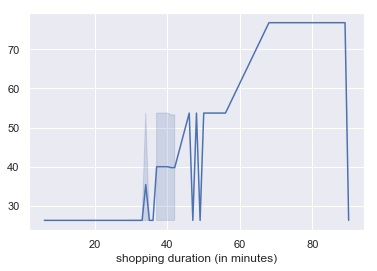

In [101]:
sns.lineplot(Y_test, Y_prediction_RF)

In [103]:
#Gradient Boosting
GB = GradientBoostingRegressor()
GB.fit(X_train, Y_train)
Y_prediction_GB = GB.predict(X_test)
GB.score(X_test,Y_test)

0.3486410185522918

In [104]:
GB.score(X_train, Y_train)

0.992059520940567

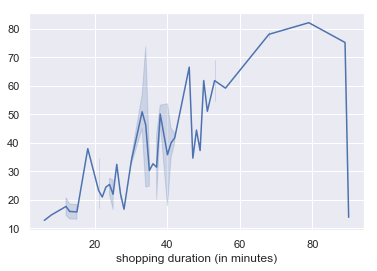

In [105]:
sns.lineplot(Y_test, Y_prediction_GB)

Machine Learning Accuracy

In [107]:
print('Training')
print("Linear Regression training Accuracy: {:.3f}".format(LR.score(X_train, Y_train)))
print("Random Forest training Accuracy: {:.3f}".format(RF.score(X_train, Y_train)))
print("Support Vector Machine training Accuracy: {:.3f}".format(SVMachine.score(X_train, Y_train)))
print("Gradient Boosting training Accuracy: {:.3f}".format(GB.score(X_train, Y_train)))

print('')
print('Testing')
print("Linear Regression testing Accuracy: {:.3f}".format(LR.score(X_test,Y_test)))
print("Random Forest testing Accuracy: {:.3f}".format(RF.score(X_test,Y_test)))
print("Support Vector Machine testing Accuracy: {:.3f}".format(SVMachine.score(X_test,Y_test)))
print("Gradient Boosting testing Accuracy: {:.3f}".format(GB.score(X_test,Y_test)))


Training
Linear Regression training Accuracy: 0.660
Random Forest training Accuracy: 0.597
Support Vector Machine training Accuracy: 0.050
Gradient Boosting training Accuracy: 0.992

Testing
Linear Regression testing Accuracy: 0.245
Random Forest testing Accuracy: 0.466
Support Vector Machine testing Accuracy: -0.028
Gradient Boosting testing Accuracy: 0.349


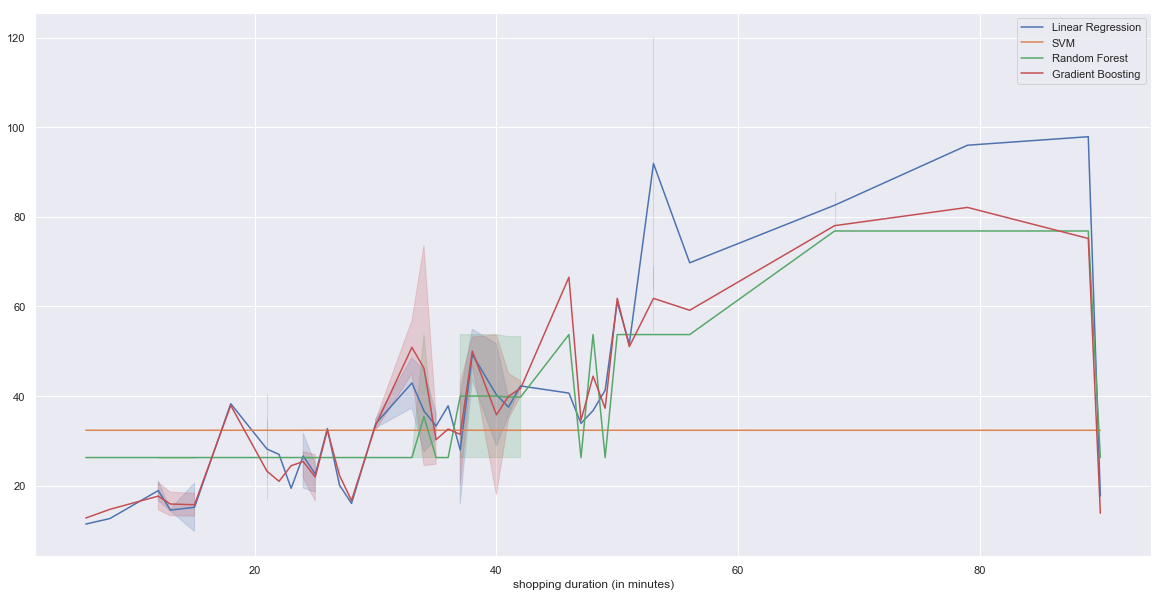

In [116]:
#Compare

sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(Y_test, Y_prediction_LR)
sns.lineplot(Y_test, Y_prediction_SVM)
sns.lineplot(Y_test, Y_prediction_RF)
sns.lineplot(Y_test, Y_prediction_GB)
plt.legend(["Linear Regression", "SVM", "Random Forest", "Gradient Boosting"])

SVM is not suitable for this data set. The accuracy for SVM is below 0, which is an underfitting. 
Other 3 algorithms do not show an accuracy of more than 25%
The main reason for this is as follows.
1. We have large amount of features.
2. The dataset is so small, only 165 instances.

# Predicting Shopping Amount

Multi Class Classification. 4 class. less, normal, bag full, heavy

# Machine Learning Approaches
1. Gradient Boosting Tree
2. Logistic Regression
3. Support Vector Machine
4. Random Forest
5. K-nn neighbors classifier
6. MLP Classifier

In [128]:
y_train = train['shopping_amount']
y_test = test['shopping_amount']

In [129]:
#Gradient Boosted Trees
model_gb = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [130]:
print("Training Accuracy: {:.3f}".format(model_gb.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(model_gb.score(X_test, y_test)))

Training Accuracy: 0.860
Testing Accuracy: 0.431


In [131]:
ytest = np.array(y_test)

In [132]:
print(classification_report(ytest, model_gb.predict(X_test)))

              precision    recall  f1-score   support

           1       0.52      0.61      0.56        23
           2       0.39      0.37      0.38        19
           3       0.00      0.00      0.00         8
           4       0.33      0.50      0.40         8

   micro avg       0.43      0.43      0.43        58
   macro avg       0.31      0.37      0.33        58
weighted avg       0.38      0.43      0.40        58



In [133]:
predictions_NN_prob1 = model_gb.predict(X_test)

In [134]:
Y_prediction_gb = model_gb.predict(X_test)

In [135]:
print(confusion_matrix(ytest, model_gb.predict(X_test)))

[[14  4  1  4]
 [ 8  7  0  4]
 [ 5  3  0  0]
 [ 0  4  0  4]]


In [136]:
#logistic regression
model= LogisticRegression(C=0.1)
model.fit(X_train, y_train)

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
print("Training Acc: {:.4f}".format(model.score(X_train, y_train)))
print("Testing Acc: {:.4f}".format(model.score(X_test, y_test)))

Training Acc: 0.6075
Testing Acc: 0.3966


In [138]:
print(classification_report(ytest, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.46      0.57      0.51        23
           2       0.35      0.37      0.36        19
           3       0.00      0.00      0.00         8
           4       0.33      0.38      0.35         8

   micro avg       0.40      0.40      0.40        58
   macro avg       0.29      0.33      0.31        58
weighted avg       0.34      0.40      0.37        58



In [139]:
print(confusion_matrix(ytest, model.predict(X_test)))

[[13  7  0  3]
 [ 9  7  0  3]
 [ 6  2  0  0]
 [ 0  4  1  3]]


In [140]:
#support vector machine
svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.33


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [141]:
print(classification_report(ytest, svc.predict(X_test)))
print(confusion_matrix(ytest, svc.predict(X_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.33      1.00      0.49        19
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8

   micro avg       0.33      0.33      0.33        58
   macro avg       0.08      0.25      0.12        58
weighted avg       0.11      0.33      0.16        58

[[ 0 23  0  0]
 [ 0 19  0  0]
 [ 0  8  0  0]
 [ 0  8  0  0]]


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [146]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model_rm = RandomForestClassifier(min_samples_leaf=3, n_estimators=100, n_jobs=-1)
model_rm.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [153]:
# Accuracy
print("Training Accuracy: {:.3f}".format(model_rm.score(X_train, y_train)))
print("Testing Accuracy: {:.3f}".format(model_rm.score(X_test, y_test)))

Training Accuracy: 0.869
Testing Accuracy: 0.362


In [148]:
print(classification_report(ytest, model_rm.predict(X_test)))
print(confusion_matrix(ytest, model_rm.predict(X_test)))

              precision    recall  f1-score   support

           1       0.46      0.52      0.49        23
           2       0.29      0.37      0.33        19
           3       0.00      0.00      0.00         8
           4       0.25      0.25      0.25         8

   micro avg       0.36      0.36      0.36        58
   macro avg       0.25      0.29      0.27        58
weighted avg       0.31      0.36      0.34        58

[[12  9  0  2]
 [ 8  7  0  4]
 [ 5  3  0  0]
 [ 1  5  0  2]]


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [166]:
#K-nn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on Testing set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.63
Accuracy of K-NN classifier on Testing set: 0.34


In [160]:
print(classification_report(ytest, knn.predict(X_test)))
print(confusion_matrix(ytest, knn.predict(X_test)))

              precision    recall  f1-score   support

           1       0.39      0.48      0.43        23
           2       0.27      0.32      0.29        19
           3       0.00      0.00      0.00         8
           4       0.50      0.38      0.43         8

   micro avg       0.34      0.34      0.34        58
   macro avg       0.29      0.29      0.29        58
weighted avg       0.31      0.34      0.33        58

[[11 10  1  1]
 [10  6  1  2]
 [ 4  4  0  0]
 [ 3  2  0  3]]


In [167]:
#neural net
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on Testing set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Accuracy on training set: 1.000
Accuracy on Testing set: 0.379


In [164]:
print(classification_report(ytest, mlp.predict(X_test)))
print(confusion_matrix(ytest, mlp.predict(X_test)))

              precision    recall  f1-score   support

           1       0.46      0.83      0.59        23
           2       0.00      0.00      0.00        19
           3       0.06      0.12      0.08         8
           4       0.00      0.00      0.00         8

   micro avg       0.34      0.34      0.34        58
   macro avg       0.13      0.24      0.17        58
weighted avg       0.19      0.34      0.25        58

[[19  1  3  0]
 [11  0  8  0]
 [ 7  0  1  0]
 [ 4  0  4  0]]


C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [169]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

print('')


print('')
#Logistic Regression
printmd("**Logistic Regression**")
print("Training Acc: {:.4f}".format(model.score(X_train, y_train)))
print("Testing Acc: {:.4f}".format(model.score(X_test, y_test)))
print('')
print(classification_report(ytest, model.predict(X_test)))


print('')
#Random Forest
printmd("**Random Forest**")
print("Training Acc: {:.3f}".format(model_rm.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(model_rm.score(X_test, y_test)))
print('')
print(classification_report(ytest, model_rm.predict(X_test)))

print('')
#Gradient Boosting
printmd("**Gradient Boosting**")
print("Training Acc: {:.3f}".format(model_gb.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(model_gb.score(X_test, y_test)))
print('')
print(classification_report(ytest, model_gb.predict(X_test)))

print('')
#Support Vector Machine
printmd("**Support Vector Machine**")
print("Training Acc: {:.3f}".format(
    svc.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(svc.score(X_test, y_test)))
print('')
print(classification_report(ytest, svc.predict(X_test)))

#K-nn neighbors classifier
printmd("**K-nn neighbors classifier**")
print("Training Acc: {:.3f}".format(
    knn.score(X_train, y_train)))
print("Testing Acc: {:.3f}".format(knn.score(X_test, y_test)))
print('')
print(classification_report(ytest, knn.predict(X_test)))

#MLP Classifier
printmd("**MLP Classifier**")
print("Training Acc: {:.3f}".format(
     mlp.score(X_train_scaled, y_train)))
print("Testing Acc: {:.3f}".format(mlp.score(X_test_scaled, y_test)))
print('')
print(classification_report(ytest, mlp.predict(X_test)))

**Logistic Regression**

Training Acc: 0.6075
Testing Acc: 0.3966

              precision    recall  f1-score   support

           1       0.46      0.57      0.51        23
           2       0.35      0.37      0.36        19
           3       0.00      0.00      0.00         8
           4       0.33      0.38      0.35         8

   micro avg       0.40      0.40      0.40        58
   macro avg       0.29      0.33      0.31        58
weighted avg       0.34      0.40      0.37        58




**Random Forest**

Training Acc: 0.869
Testing Acc: 0.362

              precision    recall  f1-score   support

           1       0.46      0.52      0.49        23
           2       0.29      0.37      0.33        19
           3       0.00      0.00      0.00         8
           4       0.25      0.25      0.25         8

   micro avg       0.36      0.36      0.36        58
   macro avg       0.25      0.29      0.27        58
weighted avg       0.31      0.36      0.34        58




C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Gradient Boosting**

Training Acc: 0.860
Testing Acc: 0.431

              precision    recall  f1-score   support

           1       0.52      0.61      0.56        23
           2       0.39      0.37      0.38        19
           3       0.00      0.00      0.00         8
           4       0.33      0.50      0.40         8

   micro avg       0.43      0.43      0.43        58
   macro avg       0.31      0.37      0.33        58
weighted avg       0.38      0.43      0.40        58




**Support Vector Machine**

Training Acc: 1.000
Testing Acc: 0.328

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.33      1.00      0.49        19
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         8

   micro avg       0.33      0.33      0.33        58
   macro avg       0.08      0.25      0.12        58
weighted avg       0.11      0.33      0.16        58



C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**K-NN**

Training Acc: 0.626
Testing Acc: 0.345

              precision    recall  f1-score   support

           1       0.39      0.48      0.43        23
           2       0.27      0.32      0.29        19
           3       0.00      0.00      0.00         8
           4       0.50      0.38      0.43         8

   micro avg       0.34      0.34      0.34        58
   macro avg       0.29      0.29      0.29        58
weighted avg       0.31      0.34      0.33        58



**MLP Classifier**

Training Acc: 1.000
Testing Acc: 0.379

              precision    recall  f1-score   support

           1       0.46      0.83      0.59        23
           2       0.00      0.00      0.00        19
           3       0.06      0.12      0.08         8
           4       0.00      0.00      0.00         8

   micro avg       0.34      0.34      0.34        58
   macro avg       0.13      0.24      0.17        58
weighted avg       0.19      0.34      0.25        58



C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Koushik\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# File to Predict Shopping Duration

In [187]:
import pickle
pickle.dump(RF, open('RF_duration.pkl','wb'))

In [188]:
RF_duration = pickle.load(open('RF_duration.pkl','rb'))

In [190]:
print(RF_duration.predict([[1,1,1,2,2,1,1,1,1,1,1]]))

[26.25]


# File to Predict Shopping Amount

In [191]:
import pickle
pickle.dump(model_rm, open('RF_amount.pkl','wb'))

In [192]:
RF_amount= pickle.load(open('RF_amount.pkl','rb'))

In [193]:
print(RF_amount.predict([[1,1,1,2,2,1,1,1,1,1,1]]))

[1]
